# Leitura e Pré-Processamento

In [367]:
import pandas as pd

df = pd.read_csv('data/drug_consumption.csv', index_col='ID')
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


O dataset possui 12 colunas de características, sendo 5 colunas categóricas e 7 colunas numéricas. As 5 colunas categóricas referem-se a faixa etária, gênero, nível de escolaridade, país de residência e etnia. As 7 colunas numéricas são indicadores comportamentais e de personalidade. Além disso, o dataset inclui 18 colunas adicionais relacionadas ao uso de drogas, que podem ser utilizadas como target para problemas de classificação.

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   object 
 1   Gender     1885 non-null   object 
 2   Education  1885 non-null   object 
 3   Country    1885 non-null   object 
 4   Ethnicity  1885 non-null   object 
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack      18

## Target

Durante a coleta dos dados, foi inserida uma droga fictícia (Semer) com o objetivo de identificar usuários que possam estar mentindo ou exagerando em suas respostas. Portanto, é prudente que esses usuários sejam excluídos da análise e que essa droga seja removida do dataset.

In [369]:
df = df[df['Semer'] == 'Never Used']
df = df.drop('Semer', axis=1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used
2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used
3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used
5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some College,No Certificate Or Degree",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,Never Used,Never Used,Never Used,Never Used,Used in Last Year,Used in Last Year,Never Used,Never Used,Never Used,Used in Last Week
1885,18-24,Male,"Some College,No Certificate Or Degree",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,Never Used,Used in Last Decade,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Month,Used in Last Month,Used in Last Week,Never Used
1886,25 - 34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used


Cada uma das 18 colunas relacionadas ao uso de drogas possui 7 possíveis valores: **Never Used**, **Used over a Decade Ago**, **Used in Last Decade**, **Used in Last Year**, **Used in Last Month**, **Used in Last Week**, e **Used in Last Day**. Para simplificar a análise, vamos agrupar esses valores em duas categorias:

- Usou há muito tempo ou nunca usou (0);
- Usou recentemente (1).

In [370]:
drug_usage_map = {
    **dict.fromkeys(['Never Used', 'Used over a Decade Ago', 'Used in Last Decade'], 0),
    **dict.fromkeys(['Used in Last Year', 'Used in Last Month', 'Used in Last Week', 'Used in Last Day'], 1)
}

Mapeando os rótulos das colunas relacionadas ao uso de drogas de acordo com a definição anterior.

In [371]:
drug_columns = df.loc[:, 'Alcohol':].columns.tolist()
df.loc[:, drug_columns] = df[drug_columns].map(lambda x: drug_usage_map[x])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,0,0,0,0,1,0,1,0
3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some College,No Certificate Or Degree",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,0,1,1,0,0,0,1
1885,18-24,Male,"Some College,No Certificate Or Degree",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,0,0,0,1,1,1,1,1,0
1886,25 - 34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0,1,0,0,0,0,0,0,1,0


Plotando a porcentagem de usuários de cada droga com base no total de usuários.

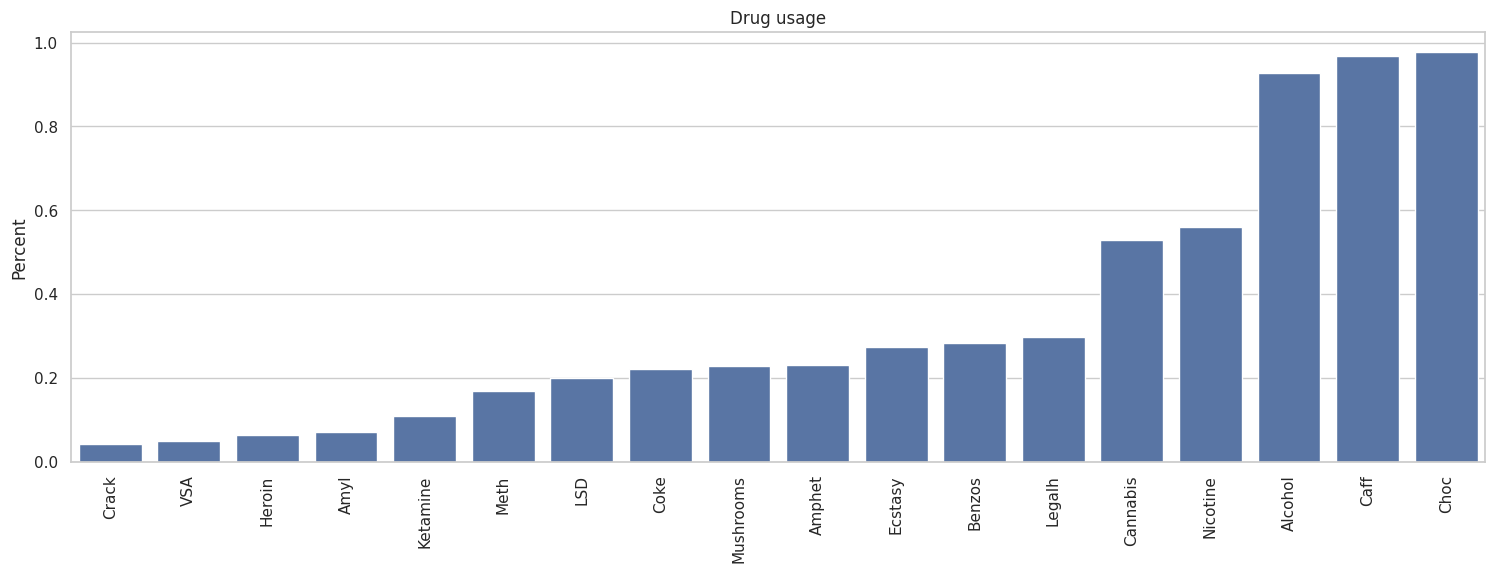

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15, 5), sharey=True)
fig.tight_layout()

usage_percent = (df[drug_columns].sum() / len(df)).sort_values()
sns.barplot(x=usage_percent.index, y=usage_percent.values, ax=ax)
ax.set_xlabel(''); ax.set_ylabel('Percent')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Drug usage')
pass

**Alcohol**, **Caff**, e **Choc** são drogas usadas por mais de 80% dos usuários, portanto, não parecem muito interessantes para a análise. **Cannabis** e **Nicotine** também são drogas muito utilizadas em comparação com as demais. Vamos removê-las temporariamente e filtrar os usuários que utilizaram pelo menos uma das outras drogas. Após isso, iremos reintroduzir **Cannabis** e **Nicotine** para realizar a análise.

In [373]:
drug_columns = [drug for drug in drug_columns if drug not in ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Nicotine']]
used_any_drug = df.loc[:, drug_columns].sum(axis=1) != 0
drug_columns = sorted(set(drug_columns + ['Cannabis', 'Nicotine']))
df = df[used_any_drug]
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,0,0,0,0,1,0,1,0
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
12,45 - 54,Male,"Some College,No Certificate Or Degree",Other,White,-1.32828,0.00332,0.14143,-1.92595,-0.52745,...,0,1,0,0,0,0,0,0,1,0
13,55 - 64,Female,University Degree,UK,White,2.28554,0.16767,0.44585,-1.62090,-0.78155,...,0,0,0,0,0,0,0,0,1,0
20,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.34799,-1.76250,-2.39883,-1.92595,0.75830,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some College,No Certificate Or Degree",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,0,1,1,0,0,0,1
1885,18-24,Male,"Some College,No Certificate Or Degree",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,0,0,0,1,1,1,1,1,0
1886,25 - 34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0,1,0,0,0,0,0,0,1,0


Plotando a correlação entre o uso das drogas.

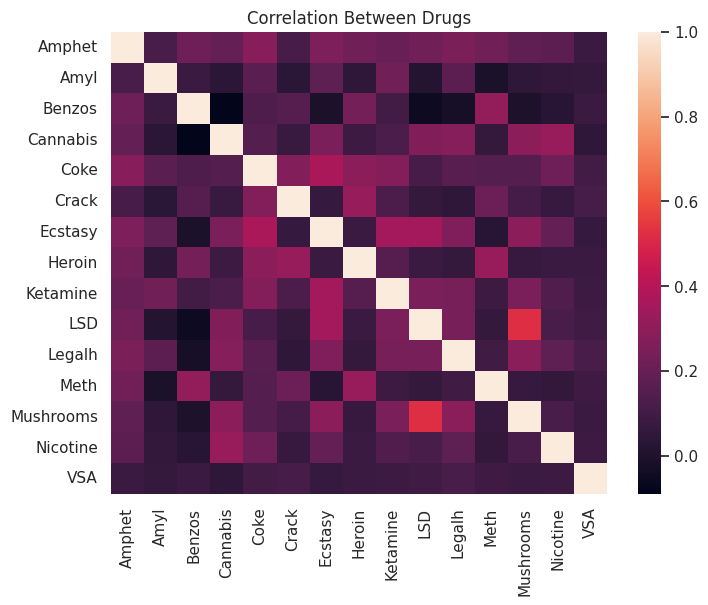

In [374]:
corr_matrix = df.loc[:, drug_columns].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, ax=ax)
ax.set_title('Correlation Between Drugs')
pass

É evidenciada uma correlação significativa entre **LSD** e **Mushrooms**, o que pode ser resultado da natureza alucinógena dessas drogas.

## Características Categóricas

Definindo um mapeamento das categorias da coluna **Age** para valores numéricos mantendo a ordem.

In [375]:
age_map = dict(list(zip(['18-24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65+'], range(6))))

Definindo um mapeamento das categorias da coluna **Education** para valores numéricos mantendo a ordem.

In [376]:
education_map = dict(list(zip([
    'Left School Before 16 years',
    'Left School at 16 years',
    'Left School at 17 years',
    'Left School at 18 years',
    'Some College,No Certificate Or Degree',
    'Professional Certificate/ Diploma',
    'University Degree',
    'Masters Degree',
    'Doctorate Degree'
], range(9))))

Plotando a distribuição dos dados de acordo com cada característica.

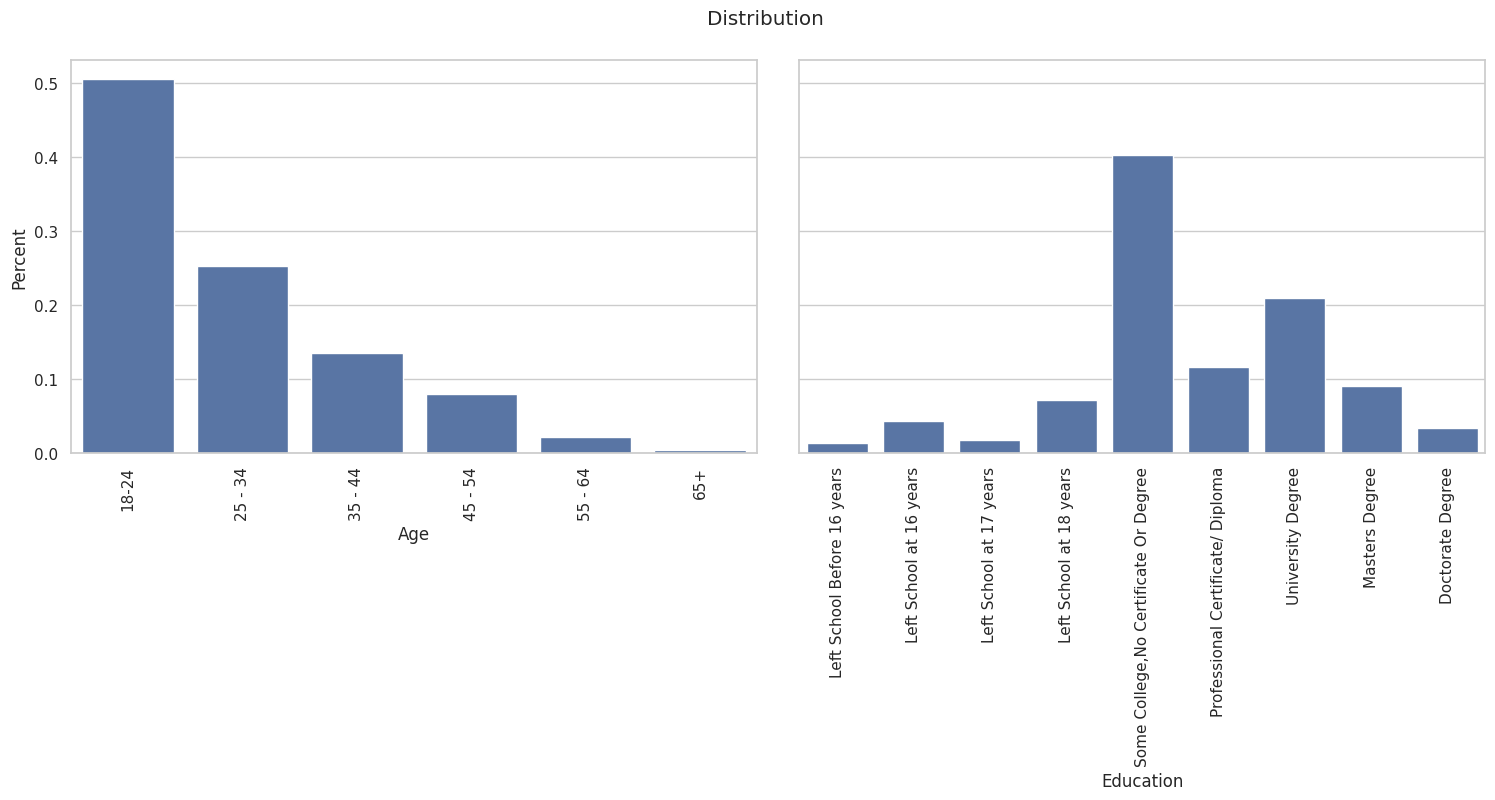

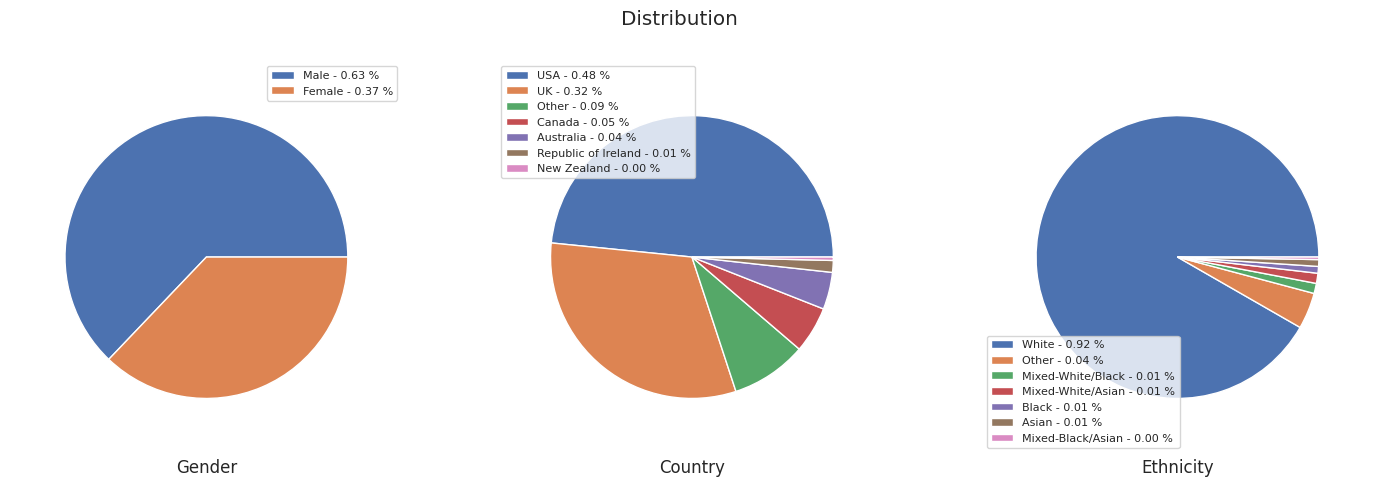

In [377]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution')
fig.tight_layout()

for ax, column, key_map in zip([ax1, ax2], ['Age', 'Education'], [age_map, education_map]):
    value_counts = (df[column].value_counts() / len(df)).sort_index(key=lambda x: [key_map[idx] for idx in x])
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Percent')

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution')
fig.tight_layout()

for ax, column in zip(axs, ['Gender', 'Country', 'Ethnicity']):
    value_counts = df[column].value_counts() / len(df)
    patches, texts = ax.pie(value_counts.values, radius=0.9)

    labels = [f'{i} - {j:1.2f} %' for i,j in zip(value_counts.index, value_counts.values)]
    ax.set_xlabel(column)
    ax.legend(patches, labels, fontsize=8)

A característica **Education** parece seguir uma distribuição normal. **USA** e **UK** representam 80% dos dados da característica **Country**, então parece prudente agrupar o restante na categoria **Other**. Como **White** representa 90% dos dados da característica **Ethnicity**, acredita-se que não vale a análise.

In [378]:
df.loc[~df['Country'].isin(['UK', 'USA']), 'Country'] = 'Other'
df['Country'].unique()

array(['UK', 'Other', 'USA'], dtype=object)

In [379]:
df = df.drop('Ethnicity', axis=1)
df

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,
2,25 - 34,Male,Doctorate Degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0,1,0,0,0,0,1,0,1,0
4,18-24,Female,Masters Degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,0,0,0,0,0,0,0,0,0
12,45 - 54,Male,"Some College,No Certificate Or Degree",Other,-1.32828,0.00332,0.14143,-1.92595,-0.52745,0.52975,...,0,1,0,0,0,0,0,0,1,0
13,55 - 64,Female,University Degree,UK,2.28554,0.16767,0.44585,-1.62090,-0.78155,1.29221,...,0,0,0,0,0,0,0,0,1,0
20,35 - 44,Male,Professional Certificate/ Diploma,UK,-0.34799,-1.76250,-2.39883,-1.92595,0.75830,-1.37983,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some College,No Certificate Or Degree",USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,0,0,0,0,1,1,0,0,0,1
1885,18-24,Male,"Some College,No Certificate Or Degree",USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,0,0,0,0,1,1,1,1,1,0
1886,25 - 34,Female,University Degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,0,1,0,0,0,0,0,0,1,0


Definição da função que plota a distribuição do uso de uma determinada droga conforme uma característica específica.

In [380]:
def plot_drug_usage_cat(data, column, order=None):
    n_rows, n_cols = 3, 5
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True, sharey=True)
    
    for i, (ax, drug_column) in enumerate(zip(axs.flatten(), drug_columns)):
        sns.barplot(data, x=column, y=drug_column, ax=ax, order=order)
        ax.set_title(drug_column)
        ax.set_xlabel(''); ax.set_ylabel('')

        is_last_row = int(i // n_cols) == (n_rows - 1)
        if is_last_row: ax.set_xlabel(column)

        is_first_col = (i % n_cols) == 0
        if is_first_col: ax.set_ylabel('Usage Percent')
        ax.tick_params(axis='x', rotation=90)

    fig.suptitle(f'Drug usage by {column.lower()}')
    fig.tight_layout()
    plt.show()

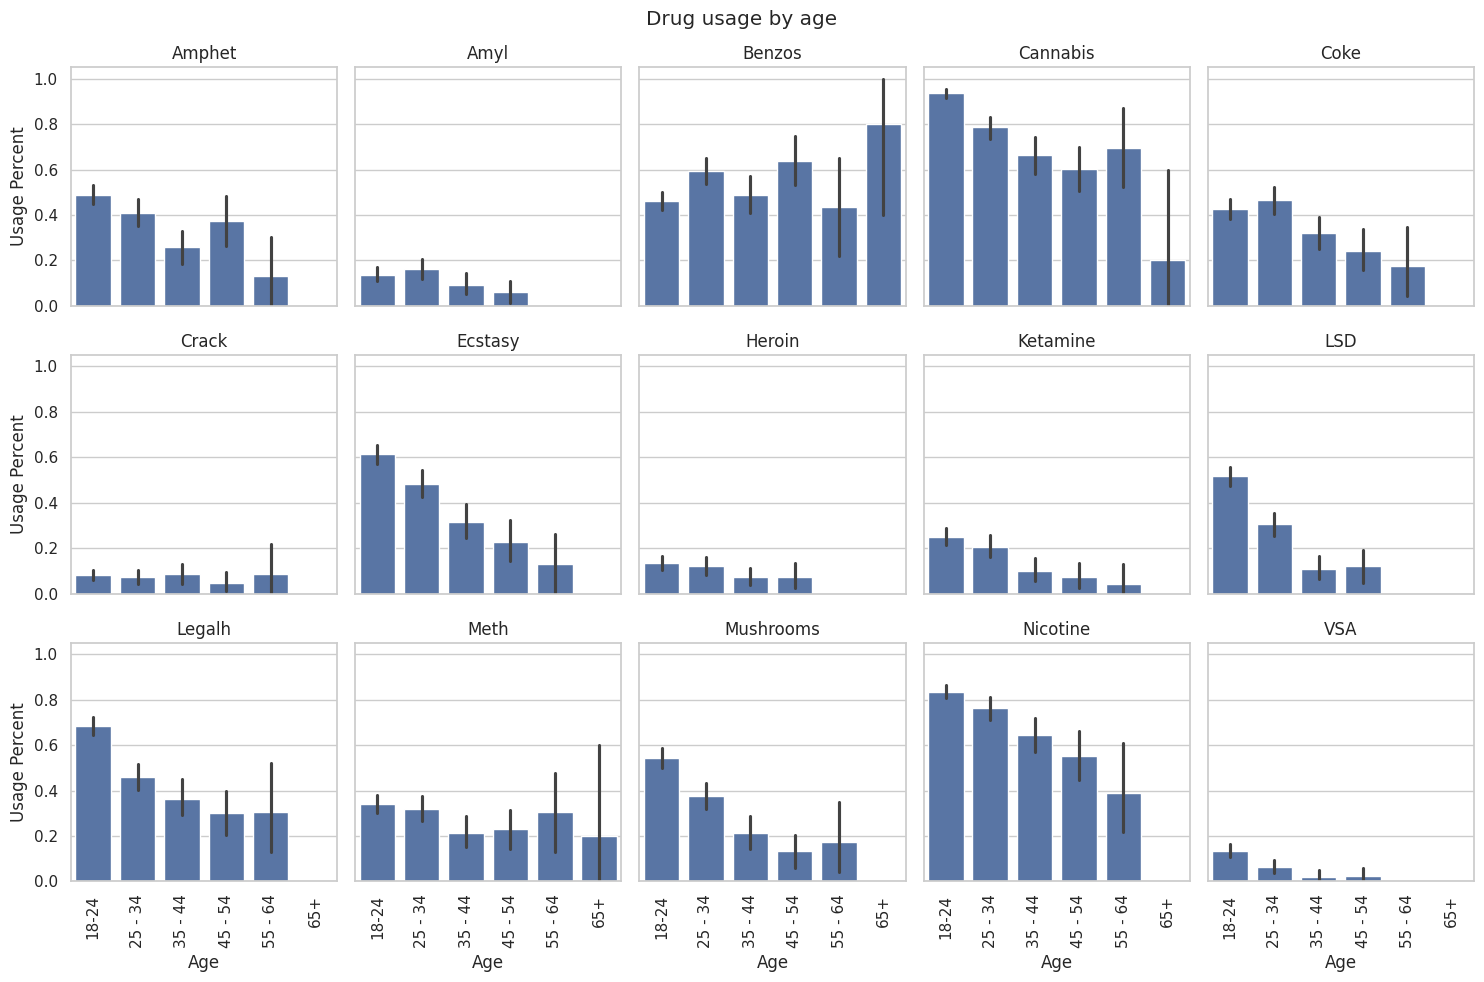

In [381]:
plot_drug_usage_cat(df, 'Age', age_map.keys())

A análise dos dados mostra que o uso da maioria das drogas tende a diminuir com o aumento da idade. No entanto, algumas drogas, como **Crack** e **Meth**, apresentam uma distribuição de uso mais uniforme entre as diferentes faixas etárias. Essa distribuição pode ser explicada pelo perfil de usuários dessas substâncias, que são consideradas drogas mais pesadas e com um alto potencial de vício. Por outro lado, **Benzos (benzodiazepínicos)** apresentam um padrão diferente, com um maior uso em idades mais avançadas em comparação com outras drogas. Isso pode ser atribuído ao fato de que **Benzos** são frequentemente prescritos para tratar condições associadas ao envelhecimento, como ansiedade, insônia e problemas musculares.

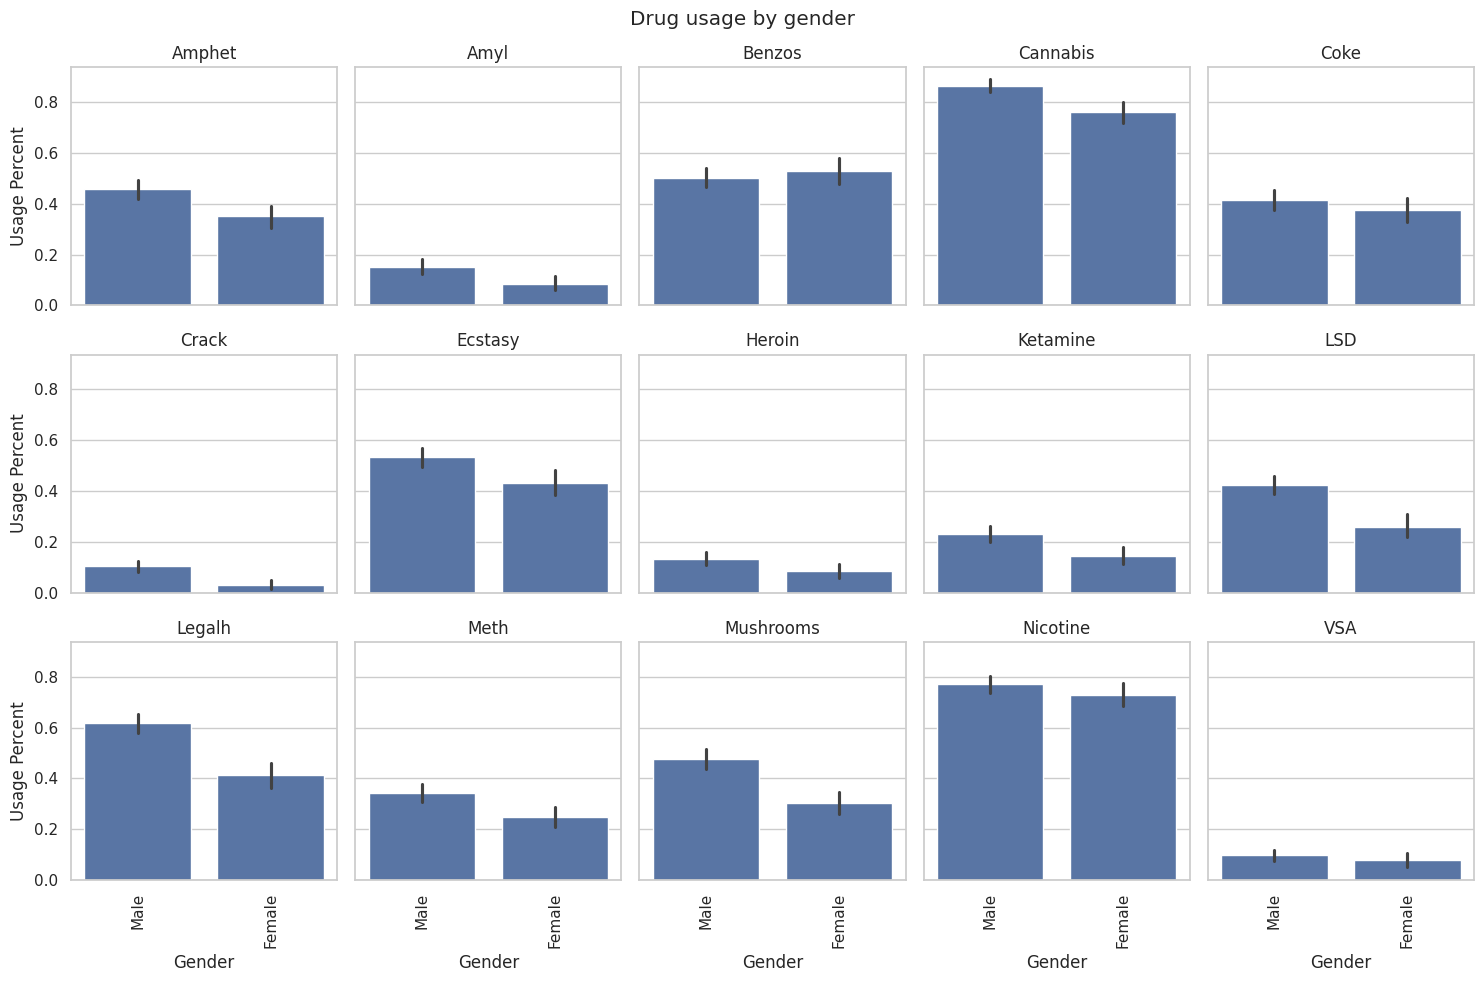

In [382]:
plot_drug_usage_cat(df, 'Gender')

De modo geral, os homens apresentaram uma taxa de consumo de drogas maior do que as mulheres.

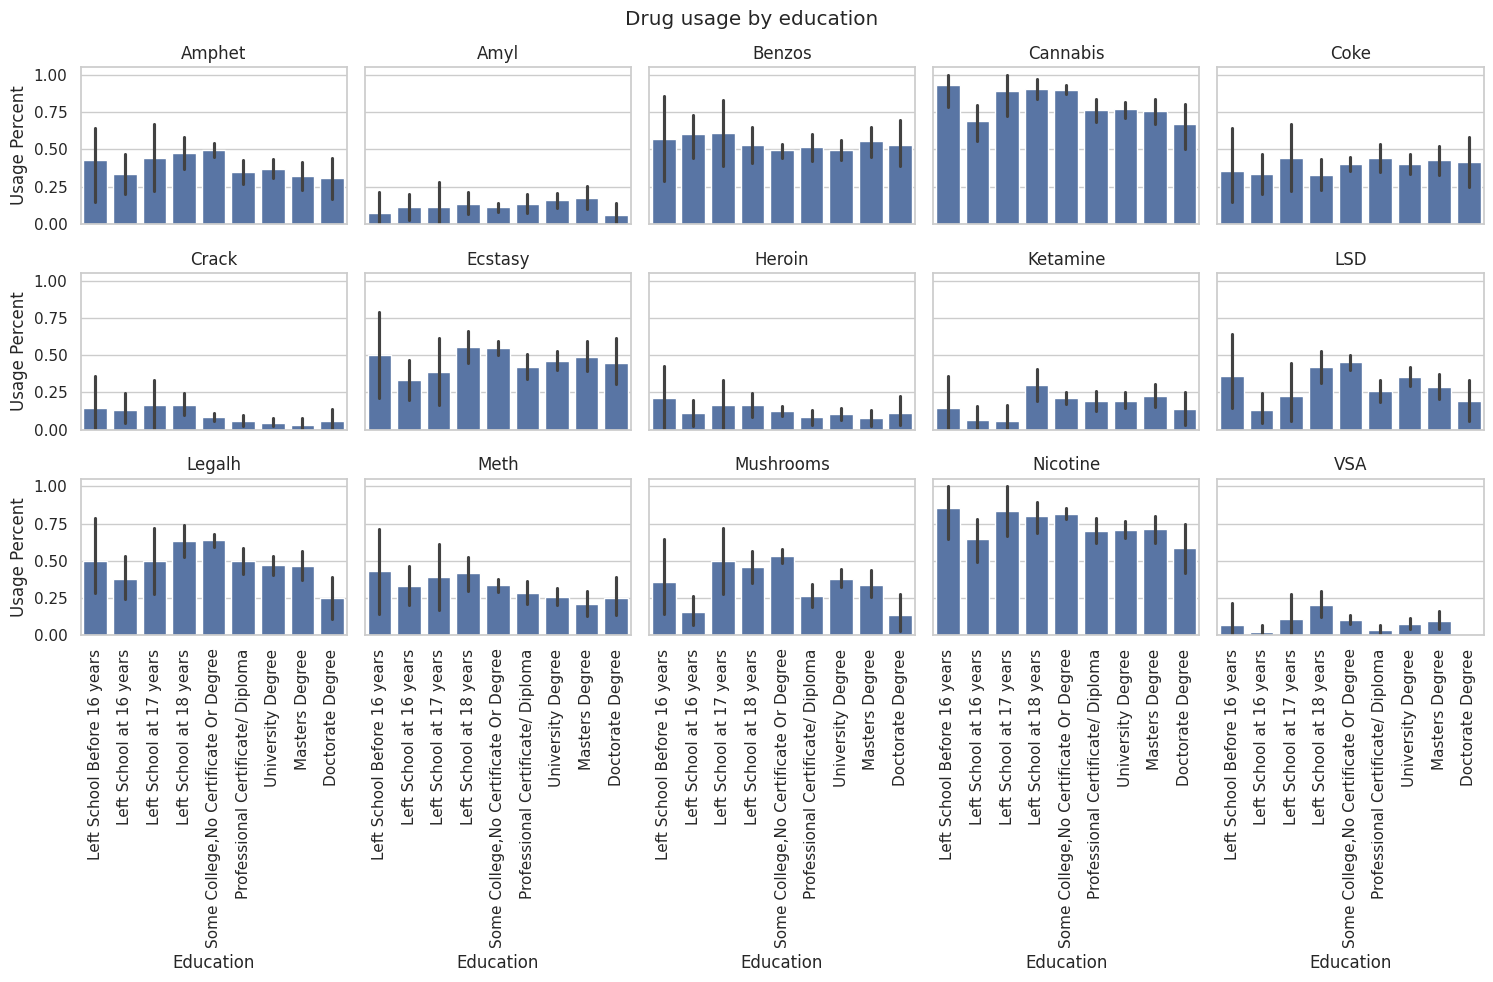

In [383]:
plot_drug_usage_cat(df, 'Education', education_map.keys())

Não foi possível identificar um padrão de uso de acordo com o nível de escolaridade.

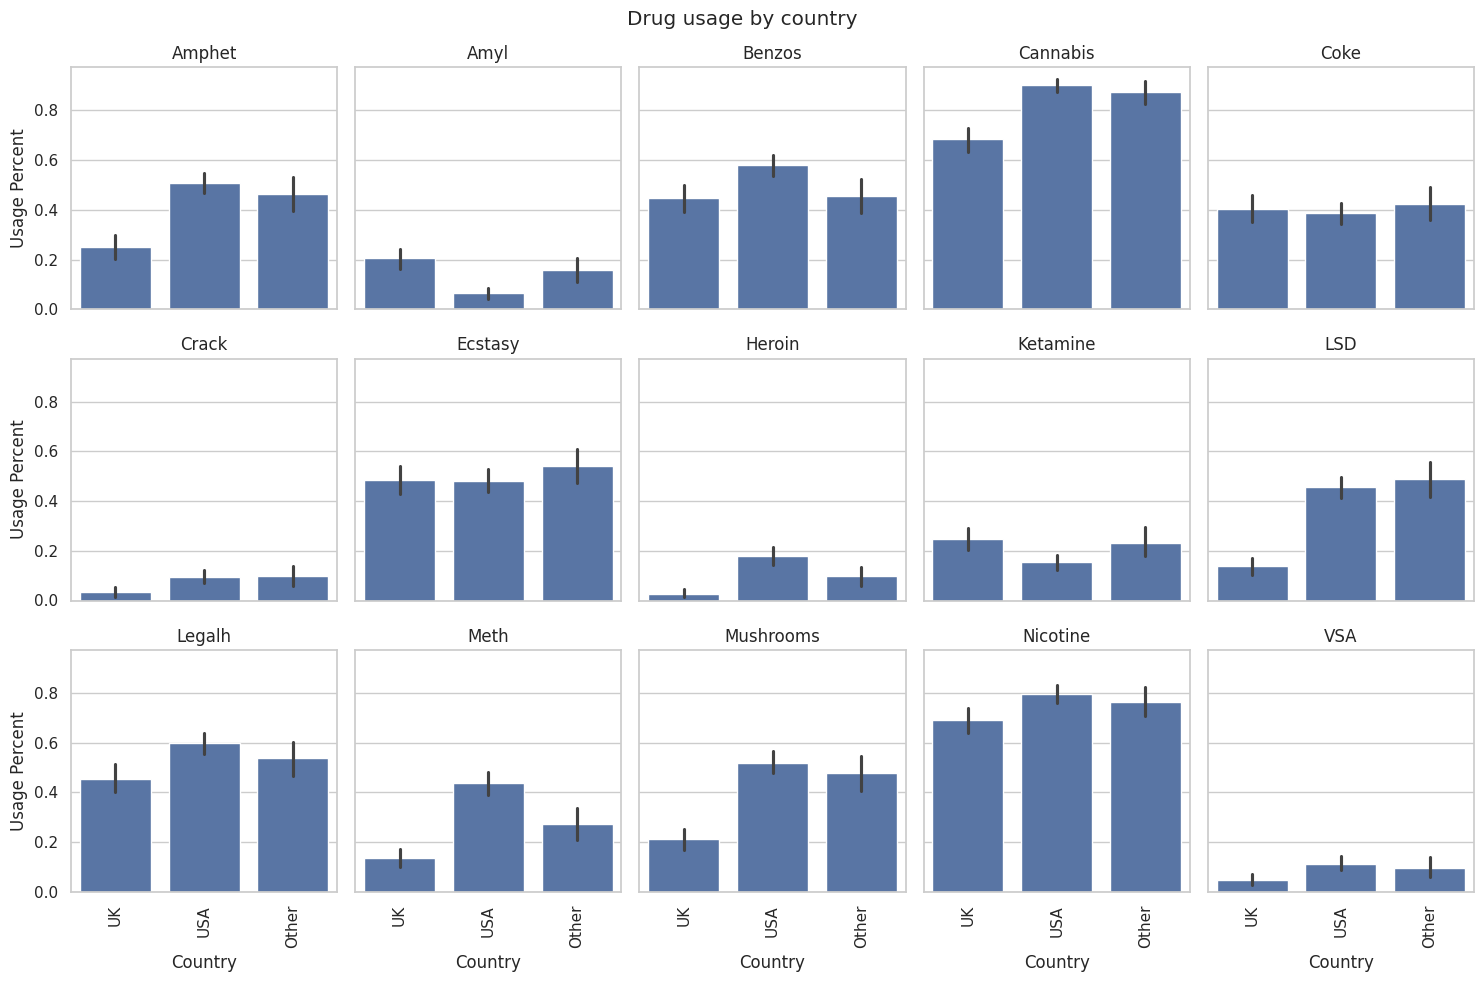

In [384]:
plot_drug_usage_cat(df, 'Country', ['UK', 'USA', 'Other'])

De modo geral, o Reino Unido apresenta uma menor taxa de consumo de drogas em comparação com os demais.

## Características Numéricas

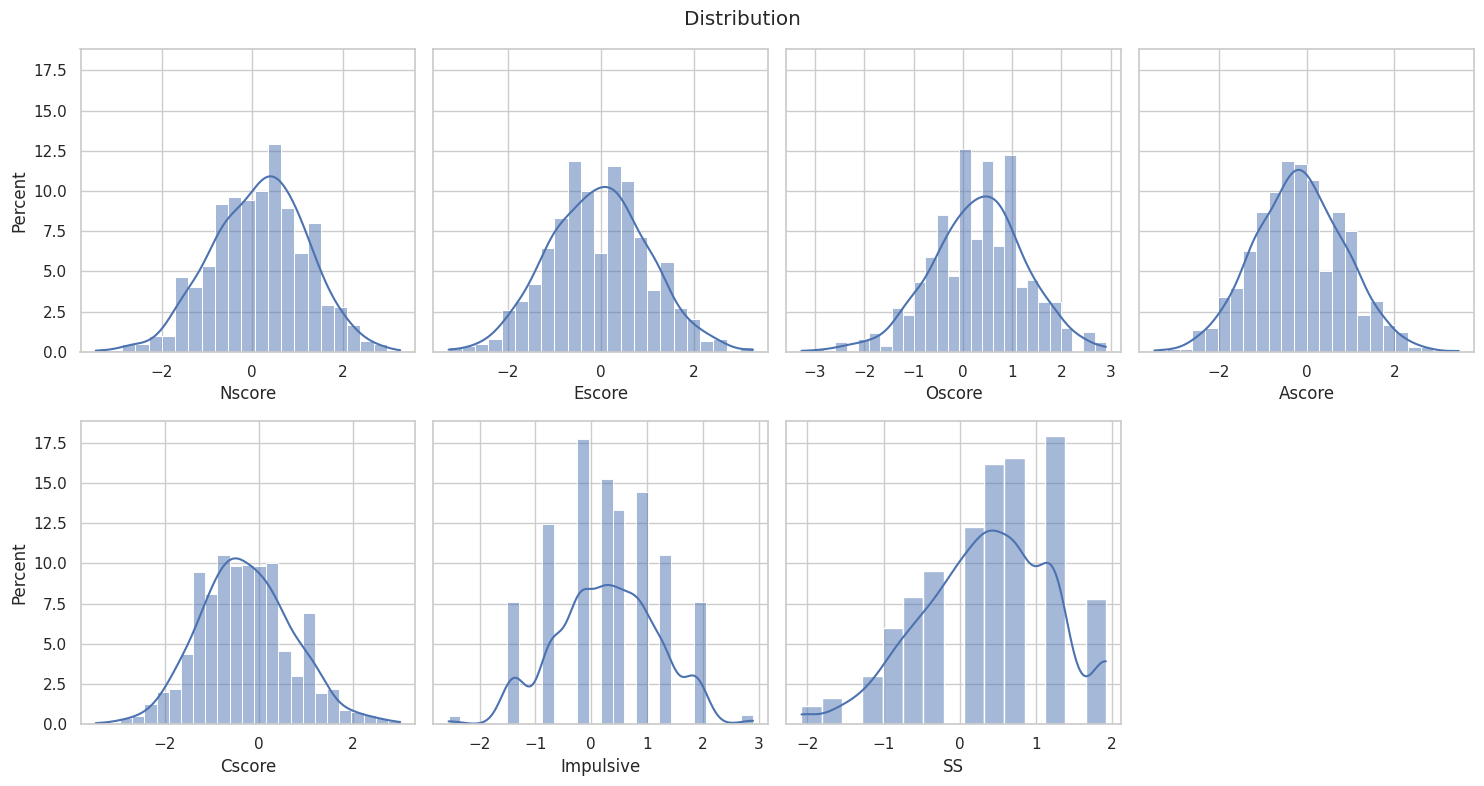

In [385]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8), sharey=True)
axs = axs.flatten()

for ax, column in zip(axs, ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']):
    sns.histplot(x=df[column], stat='percent', kde=True, ax=ax)
axs[-1].axis('off')

fig.suptitle('Distribution')
fig.tight_layout()